## HIGH DIMENSIONAL ANALYSIS
### Programming Exercise: 01
### Nguyễn Quốc Bảo - 18110053
---

## Table of Content
1. Introduction
2. Read data
3. visualization
4. Construct PCA

## 1. Introduction
- Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset description:
 - N = 144: number of samples
 - K = 4 + 1 columns containing the date and time at which the 4 temperatures were recorded
 - Temperature measurements from 4 corners of a room: front left, front right, back left and back right. 

## 2. Read data

In [2]:
data = pd.read_csv('room-temperature.csv',index_col=0, parse_dates=True, squeeze=True)
print(data.shape)
data.head()

(144, 4)


,FrontLeft,FrontRight,BackLeft,BackRight
Date,,,,
2010-04-11 11:30:00,295.2,297.0,295.8,296.3
2010-04-11 12:00:00,296.2,296.4,296.2,296.3
2010-04-11 12:30:00,297.3,297.5,296.7,297.1
2010-04-11 13:00:00,295.9,296.7,297.4,297.0
2010-04-11 13:30:00,297.2,296.5,297.6,297.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2010-04-11 11:30:00 to 2010-04-14 11:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FrontLeft   144 non-null    float64
 1   FrontRight  144 non-null    float64
 2   BackLeft    144 non-null    float64
 3   BackRight   144 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [4]:
# check null
data.isnull().sum()

FrontLeft     0
FrontRight    0
BackLeft      0
BackRight     0
dtype: int64

## 3. Visualization

### Plot a time series plot for each type of temperature data: FrontLeft, FrontRight, BackLeft and BackRight.

Text(0.5, 0, 'Date')

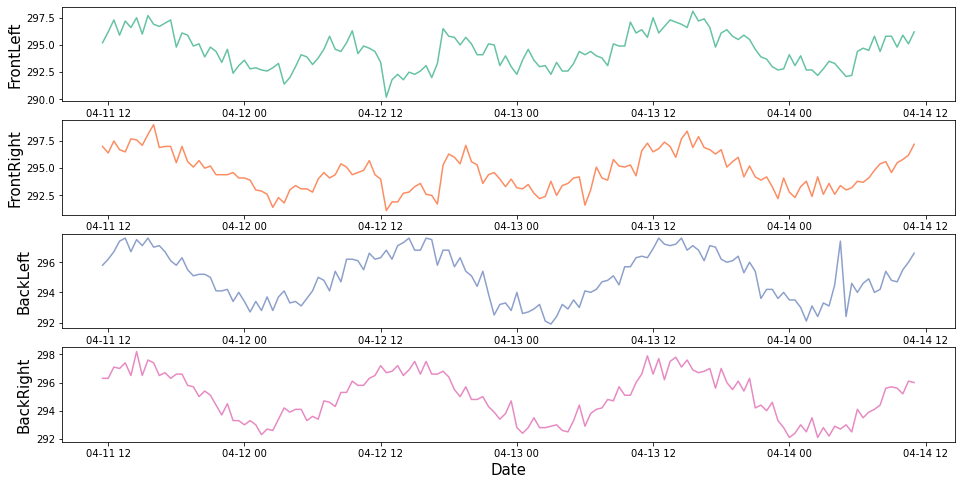

In [5]:
fig, axes = plt.subplots(data.shape[1], 1, figsize=(16, 8))
colors = sns.color_palette("Set2", n_colors=data.shape[1])
for col, ax,color in zip(data.columns, axes.flatten(),colors):
    sns.lineplot(x = data.index,y =  data[col] , ax=ax, color=color )
    ax.set_ylabel(col, fontsize = 15)
    ax.set_xlabel(data.index.name, fontsize = 15)
ax.set_xlabel('Date')

#### From this plot, the temperature data changes every 30 minutes in a day.  Increase at noon and decrease in the evening 

## 4. Construct PCA 

In [6]:
def Cumulative_plot(eigen_values):
    '''
        The Cumulative plot shows the amount of information available for each eigenvector
        -----------------------
        Parameters:
            eigen_value: array-like
                Give eigen_values from algorithm PCA
    '''
    fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 8), sharex = True)
    eigenvals = np.array(eigen_values)
    cumsum = np.cumsum(eigenvals)
    cumsum /= cumsum[-1]

    axes[0].plot(range(len(eigenvals)), eigenvals, marker = '.', color = 'b', label = 'Eigenvalue')
    axes[1].plot(range(len(cumsum)), cumsum, marker = '.', color = 'r', label = 'Cumulative proportion')
    plt.xlabel('number of components',fontsize = 13)
    axes[0].legend()
    axes[1].legend()
    plt.show()

In [22]:
class PCA_model:
    """ Principal Component Analysis (PCA) """
    def __init__(self, n_component = None):
        """
            n_components: int, default=None
                Number of components to keep. 
                the None case results in: n_components == min(n_samples, n_features) - 1
        """
        self.n_component = n_component

    def fit_transform(self, X):
        if self.n_component == None:
            self.n_component = min(X.shape[0],X.shape[1]) - 1
        
        if (isinstance(X, np.ndarray)==False):
            X = X.to_numpy()
            
        # compute mean vector of X
        self.mean_ = np.mean(X, axis = 0)
        # standardization
        X_std = X - self.mean_
        
        # compute covariance of X
        self.cov_mat = np.cov(X_std ,rowvar=False)
        
        # compute eigenvalue and eigenvector
        eigen_values, eigen_vectors = np.linalg.eigh(self.cov_mat)

        
        # sort eigenvector
        sorted_index = np.argsort(eigen_values)[::-1]
        self.eigen_values = eigen_values[sorted_index]
        self.eigen_vectors = (-1)*eigen_vectors[:,sorted_index]
         
        # eigenpairs sorted
        eigenpairs = self.eigen_vectors[:,0:self.n_component]
        
        # Transform X
        X_reduced = np.dot(X_std,eigenpairs)
        return X_reduced
        

### Implement the PCA algorithm to the whole data set.

In [23]:
PCA_m = PCA_model(n_component=2)
PC = PCA_m.fit_transform(data)

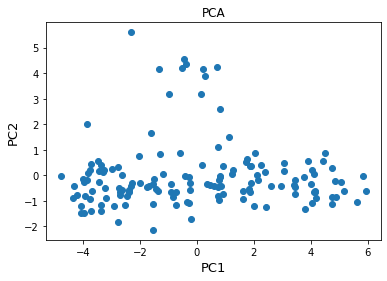

In [41]:
plt.scatter(PC[:,0],PC[:,1])
plt.title('PCA')
plt.xlabel('PC1', fontsize = 13)
plt.ylabel('PC2', fontsize = 13)
plt.show()

### Compare with sklearn

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
X_pca = pca.transform(data)

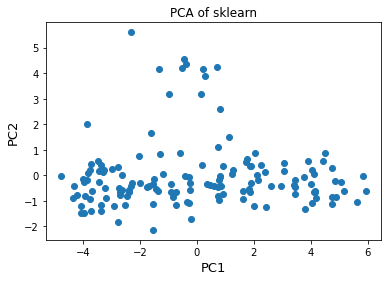

In [11]:
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.title('PCA of sklearn')
plt.xlabel('PC1', fontsize = 13)
plt.ylabel('PC2', fontsize = 13)
plt.show()

###  After observing these time series plot in a), how many latent variables should we use for the PCA algorithm to keep the most meaningful information? Apply the PCA for the temperature data by your chosen number of latent variables.

eigen_values : [8.34471259 1.82614004 0.41382139 0.29663183]


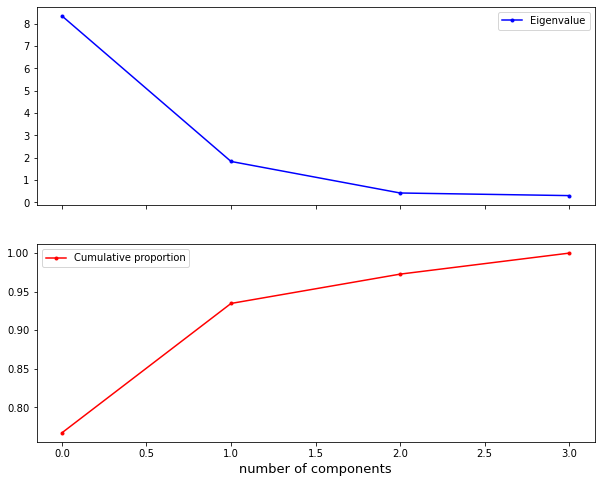

In [12]:
print('eigen_values :',PCA_m.eigen_values)
Cumulative_plot(PCA_m.eigen_values)
# when n_component = 2 then important information is retained as 0.93470883

In [14]:
pca.components_

array([[ 0.49391128,  0.52817872,  0.46980861,  0.50631883],
       [-0.50203076, -0.47304176,  0.54077759,  0.48141065]])

In [15]:
PCA_m.eigen_vectors

array([[ 0.49391128, -0.50203076, -0.70984479, -0.01171101],
       [ 0.52817872, -0.47304176,  0.70076399,  0.07866743],
       [ 0.46980861,  0.54077759, -0.06702403,  0.69451224],
       [ 0.50631883,  0.48141065,  0.02362183, -0.71507135]])

In [29]:
X = data.to_numpy()
std = (X - np.mean(X,axis = 0))/np.std(X, axis = 0)
std
cov_mat = np.cov(std,rowvar=False)
cov_mat

array([[1.00699301, 0.85843736, 0.56224176, 0.60990539],
       [0.85843736, 1.00699301, 0.59178547, 0.64356475],
       [0.56224176, 0.59178547, 1.00699301, 0.89020112],
       [0.60990539, 0.64356475, 0.89020112, 1.00699301]])

In [49]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print(eigen_values)
eigen_vectors[:2]

[3.08574919 0.68059492 0.14777058 0.11385733]


array([[-0.49127375, -0.5308801 , -0.68995833,  0.02781941],
       [-0.50211307, -0.47235221,  0.71672467, -0.10522166]])

In [48]:
eigen_vectors[:2]

array([[ 0.02781941,  0.68995833,  0.5308801 , -0.49127375],
       [-0.10522166, -0.71672467,  0.47235221, -0.50211307]])

In [57]:
X_PCA = (-1)np.dot(std,(-1)*eigen_vectors[:2].T)
X_PCA

array([[ 1.2433646 ,  0.61824162],
       [ 1.53120436,  0.57761179],
       [ 2.40711104,  1.04341516],
       [ 2.04588863,  0.06987214],
       [ 2.45391116,  0.34794022],
       [ 2.26955773,  0.84576308],
       [ 2.82835112,  0.84043055],
       [ 2.07775865,  0.31491179],
       [ 3.09738556,  0.9561383 ],
       [ 2.8788568 ,  1.21873711],
       [ 2.22547862,  0.47411042],
       [ 2.16865149,  0.78767985],
       [ 2.00371423,  1.12575843],
       [ 0.65245642,  0.10036355],
       [ 1.72611754,  0.68671984],
       [ 0.89600102,  0.549655  ],
       [ 0.2681846 ,  0.279873  ],
       [ 0.5699745 ,  0.41680847],
       [-0.01395947, -0.11867838],
       [ 0.23582695,  0.28371695],
       [-0.5131807 ,  0.30290272],
       [-0.80109387, -0.04834805],
       [-0.4113124 ,  0.3252897 ],
       [-1.33722355, -0.00800153],
       [-1.02103929, -0.20351048],
       [-1.12771614,  0.20225469],
       [-1.7399961 ,  0.23819474],
       [-1.67922923, -0.31622012],
       [-2.02003131,

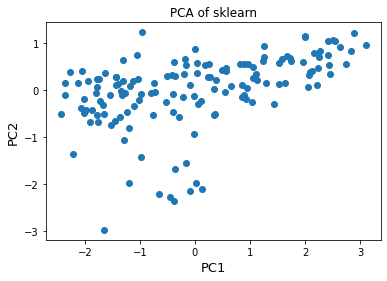

In [58]:
plt.scatter(X_PCA[:,0],X_PCA[:,1])
plt.title('PCA of sklearn')
plt.xlabel('PC1', fontsize = 13)
plt.ylabel('PC2', fontsize = 13)
plt.show()

In [ ]:
array([[ 0.49391128,  0.52817872,  0.46980861,  0.50631883],
       [-0.50203076, -0.47304176,  0.54077759,  0.48141065]])